In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.DataFrame({"ht": np.random.randint(12,86,100), "wt": np.random.randint(50,110,100)})
df.head()

,ht,wt
0,69,66
1,77,56
2,28,104
3,58,92
4,34,62


In [3]:
diagnosis = np.array(['negative', 'positive'])
np.random.choice(diagnosis, 100)

array(['negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'negative', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positi

In [4]:
df['diagnosis'] = np.random.choice(diagnosis, 100)
df.head()

,ht,wt,diagnosis
0,69,66,negative
1,77,56,negative
2,28,104,positive
3,58,92,negative
4,34,62,negative


In [5]:
X = df[['ht', 'wt']]
y = df['diagnosis']

In [6]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [7]:
model.score(X,y)

0.59

In [8]:
w, b = model.coef_[0], model.intercept_
w, b

(array([ 0.01143633, -0.01184964]), array([0.52078049]))

In [9]:
y_predict = df['ht']*w[0]+df['wt']*w[1]+b
y_predict.values[:20]

array([ 0.52781083,  0.73779784, -0.39136489,  0.0939206 ,  0.17493794,
        0.31493062,  0.25333898, -0.0212693 , -0.35870916,  0.71657844,
       -0.51551123,  0.00628623, -0.56456304,  0.2548558 ,  0.04872503,
        0.26505219,  0.27056169,  0.16474155,  0.22950327,  0.58871228])

In [10]:
# Calculating "sigmoid function" manually.

p = 1/(1+np.exp(-y_predict))
p.values[:20]

array([0.62897238, 0.67651412, 0.40338878, 0.5234629 , 0.54362329,
       0.57808831, 0.56299817, 0.49468288, 0.41127208, 0.67185312,
       0.37390246, 0.50157155, 0.36249232, 0.56337132, 0.51217885,
       0.56587782, 0.56723079, 0.54109249, 0.5571253 , 0.64306963])

In [11]:
# Manually checking the probabilities of the predicted values.

np.array(['positive' if i>=0.50 else 'negative' for i in p])[:20]

array(['positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype='<U8')

In [12]:
model.predict_proba(X)[:20]

array([[0.37102762, 0.62897238],
       [0.32348588, 0.67651412],
       [0.59661122, 0.40338878],
       [0.4765371 , 0.5234629 ],
       [0.45637671, 0.54362329],
       [0.42191169, 0.57808831],
       [0.43700183, 0.56299817],
       [0.50531712, 0.49468288],
       [0.58872792, 0.41127208],
       [0.32814688, 0.67185312],
       [0.62609754, 0.37390246],
       [0.49842845, 0.50157155],
       [0.63750768, 0.36249232],
       [0.43662868, 0.56337132],
       [0.48782115, 0.51217885],
       [0.43412218, 0.56587782],
       [0.43276921, 0.56723079],
       [0.45890751, 0.54109249],
       [0.4428747 , 0.5571253 ],
       [0.35693037, 0.64306963]])

In [13]:
# Directly the model is calculating the "sigmoid function" and giving us the probabilities.

model.predict(X)[:20]

array(['positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive'],
      dtype=object)

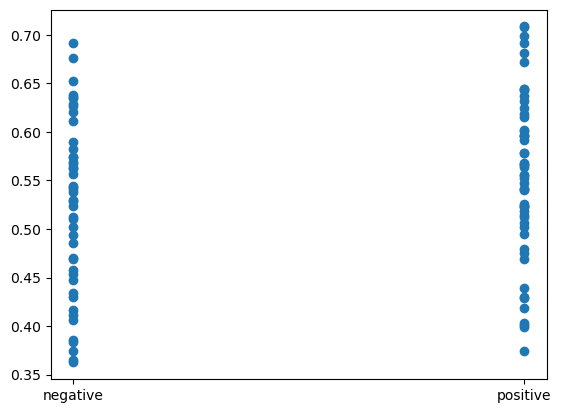

In [14]:
plt.scatter(y,p)
plt.show()

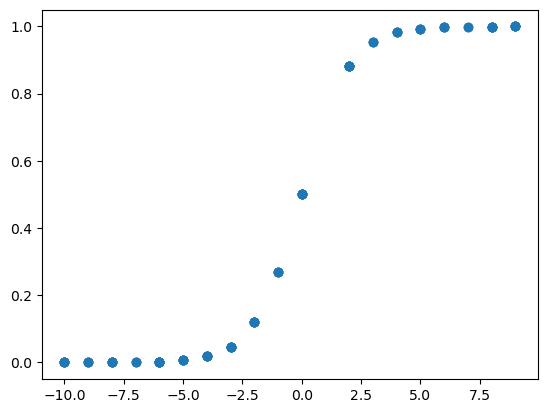

In [17]:
y1 = np.random.randint(-10,10,100)
p1 = 1/(1+np.exp(-y1))
plt.scatter(y1,p1)
plt.show()

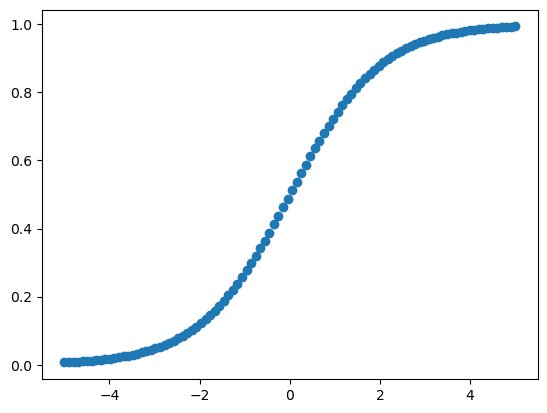

In [19]:
y2 = np.linspace(-5,5,100)
p2 = 1/(1+np.exp(-y2))
plt.scatter(y2,p2)
plt.show()

In [20]:
fruits = pd.read_csv("E:/Python Programs/fruits.csv")
fruits.head()

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [21]:
X = fruits[['sphericity', 'weight']]
y = fruits['label']

In [33]:
X_scaled = pd.DataFrame(minmax_scale(X), columns=X.columns)
X_scaled.head()

,sphericity,weight
0,1.000000,0.228916
1,0.873418,0.289157
2,0.898734,0.108434
3,0.869198,0.265060
4,0.983122,0.277108


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45, 2), (45,), (15, 2), (15,))

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8666666666666667

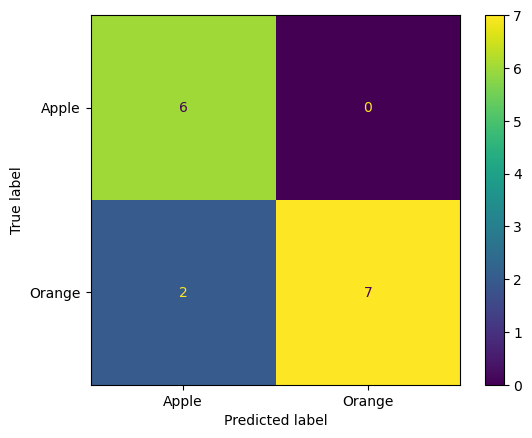

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()